In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn import linear_model
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn import preprocessing 
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report,roc_curve, roc_auc_score

data_set = pd.read_csv('heart-disease.csv')



In [4]:
duplicates = data_set[data_set.duplicated(keep=False)]  # keep=False pour garder toutes les occurrences

# Afficher les doublons
print("Valeurs dupliquées dans le dataset :")
print(duplicates)

Valeurs dupliquées dans le dataset :
     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
163   38    1   2       138   175    0        1      173      0      0.0   
164   38    1   2       138   175    0        1      173      0      0.0   

     slope  ca  thal  target  
163      2   4     2       1  
164      2   4     2       1  



Distribution des variables numériques :


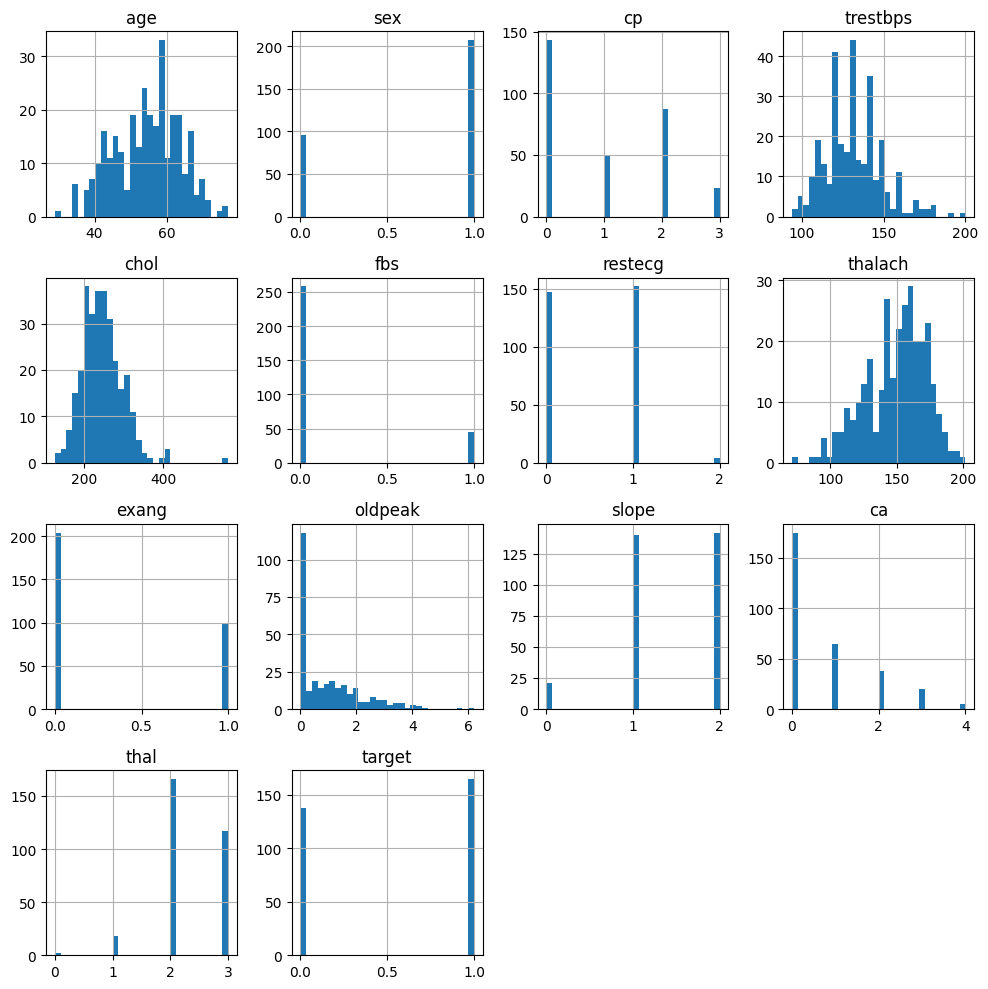

In [17]:
# Distribution des variables numériques
print("\nDistribution des variables numériques :")
data_set.hist(figsize=(10, 10), bins=30)
plt.tight_layout()
plt.show()

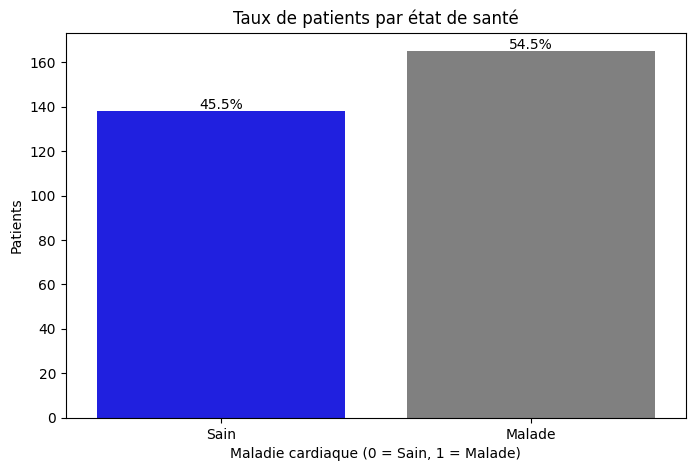

In [3]:
#Exploration des données

#data_set= data_set.drop_duplicates()# Retrait des valeurs dupliquées


colors = {0: 'blue', 1: 'gray'}  
total = data_set['target'].count()
counts = data_set['target'].value_counts()
percentages = (counts / total) * 100
# Create a count plot for the target variable
plt.figure(figsize=(8, 5))
sns.countplot(data=data_set, x='target', hue='target', palette=colors, legend=False)
for i in range(len(counts)):
    plt.text(i, counts[i] + 1, f'{percentages[i]:.1f}%', ha='center', color='black')

# Add titles and labels
plt.title('Taux de patients par état de santé')
plt.xlabel('Maladie cardiaque (0 = Sain, 1 = Malade)')
plt.ylabel('Patients')

# Customize x-ticks
plt.xticks(ticks=[0, 1], labels=['Sain', 'Malade'])

# Show the plot
plt.show()


<Figure size 1000x600 with 0 Axes>

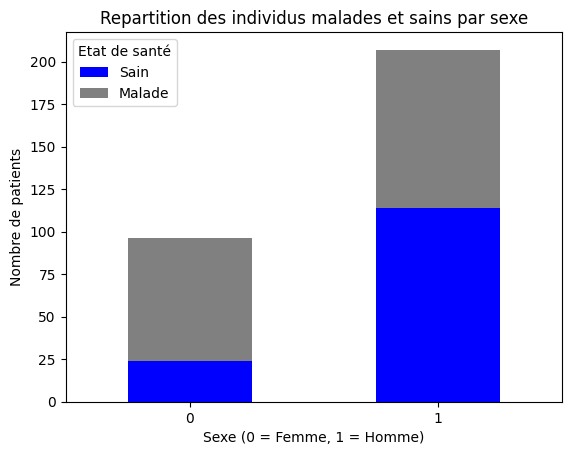

In [4]:
# Create a summary
summary = data_set.groupby(['sex', 'target']).size().unstack(fill_value=0)


summary.columns = ['Sain', 'Malade']

summary = summary.reset_index()

# Visualiser les données
plt.figure(figsize=(10, 6))
summary.plot(x='sex', kind='bar', stacked=True, color=['blue', 'gray'])

# Ajouter des titres et des étiquettes
plt.title('Repartition des individus malades et sains par sexe')
plt.xlabel('Sexe (0 = Femme, 1 = Homme)')
plt.ylabel('Nombre de patients')
plt.xticks(rotation=0)  # Rotates the x-axis labels for better readability
plt.legend(title='Etat de santé')
plt.show()


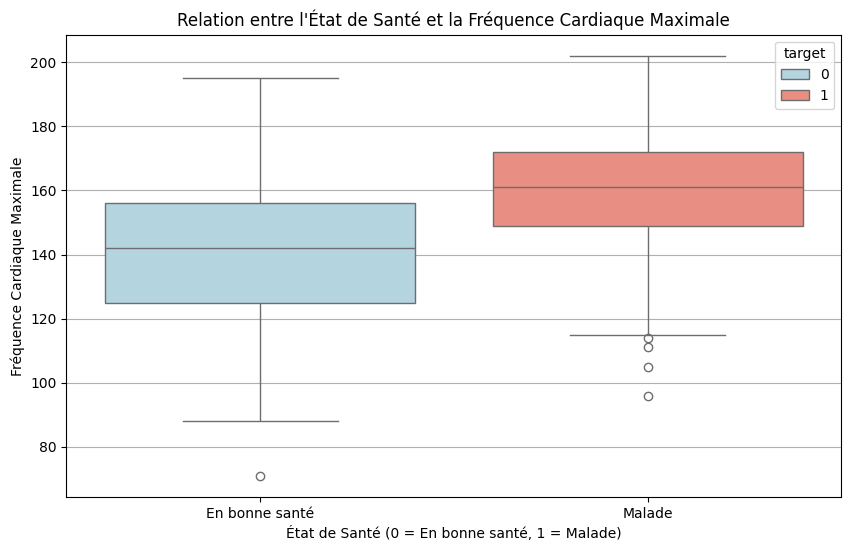

In [57]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='target', y='thalach', data=data_set,hue='target', palette=['lightblue', 'salmon'])

# Ajouter des titres et des étiquettes
plt.title('Relation entre l\'État de Santé et la Fréquence Cardiaque Maximale')
plt.xlabel('État de Santé (0 = En bonne santé, 1 = Malade)')
plt.ylabel('Fréquence Cardiaque Maximale')
plt.xticks(ticks=[0, 1], labels=['En bonne santé', 'Malade'])
plt.grid(axis='y')

# Afficher le graphique
plt.show()

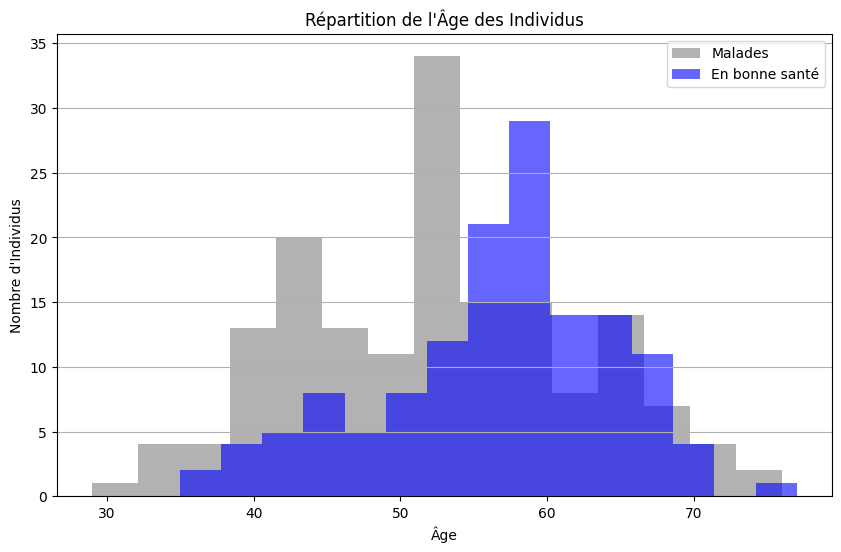

In [5]:
plt.figure(figsize=(10, 6))

# Histogramme pour les individus malades
plt.hist(data_set[data_set['target'] == 1]['age'], bins=15, alpha=0.6, label='Malades', color='gray')

# Histogramme pour les individus en bonne santé
plt.hist(data_set[data_set['target'] == 0]['age'], bins=15, alpha=0.6, label='En bonne santé', color='blue')

# Ajouter des titres et des étiquettes
plt.title('Répartition Par l\'Âge des Individus')
plt.xlabel('Âge')
plt.ylabel('Nombre d\'Individus')
plt.legend()
plt.grid(axis='y')

# Afficher le graphique
plt.show()

<Figure size 1000x600 with 0 Axes>

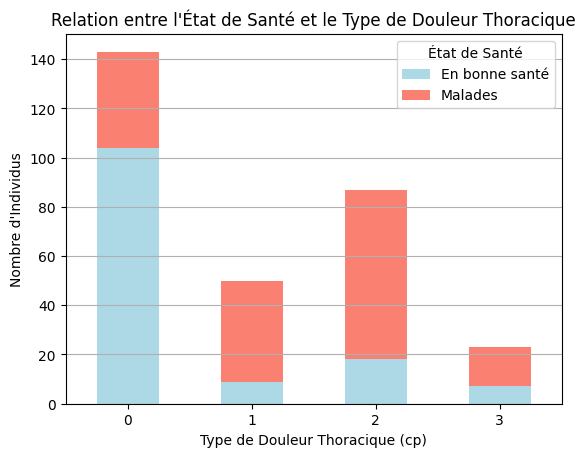

In [54]:
# Créer un tableau croisé
cp_health_distribution = data_set.groupby(['cp', 'target']).size().unstack(fill_value=0)

# Visualiser la répartition avec un graphique à barres
plt.figure(figsize=(10, 6))
cp_health_distribution.plot(kind='bar', stacked=True, color=['lightblue', 'salmon'])

# Ajouter des titres et des étiquettes
plt.title('Relation entre l\'État de Santé et le Type de Douleur Thoracique')
plt.xlabel('Type de Douleur Thoracique (cp)')
plt.ylabel('Nombre d\'Individus')
plt.xticks(rotation=0)  # Pour rendre les étiquettes lisibles
plt.legend(title='État de Santé', labels=['En bonne santé', 'Malades'])
plt.grid(axis='y')

# Afficher le graphique
plt.show()

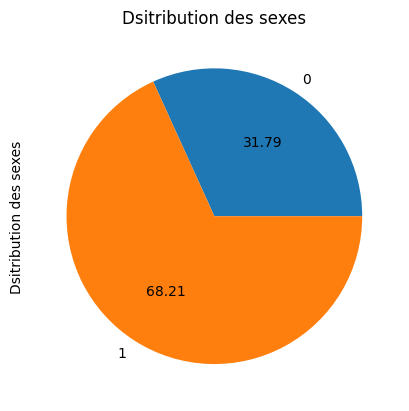

In [27]:
class_series = data_set.groupby('sex').size()
class_series.name = 'Dsitribution des sexes'
class_series.plot.pie(autopct='%.2f')
plt.title('Dsitribution des sexes')
plt.show()

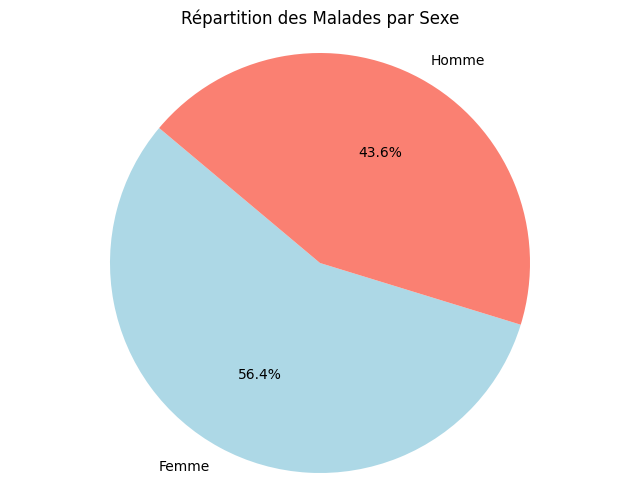

In [52]:
# Compter le nombre de malades par sexe
sick_patients = data_set[data_set['target'] == 1]
sex_distribution = sick_patients['sex'].value_counts()

# Définir les étiquettes pour le graphique
labels = ['Femme', 'Homme']
sizes = sex_distribution.values
colors = ['lightblue', 'salmon']

# Créer le pie chart
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Assure que le graphique est un cercle
plt.title('Répartition des Malades par Sexe')
plt.show()

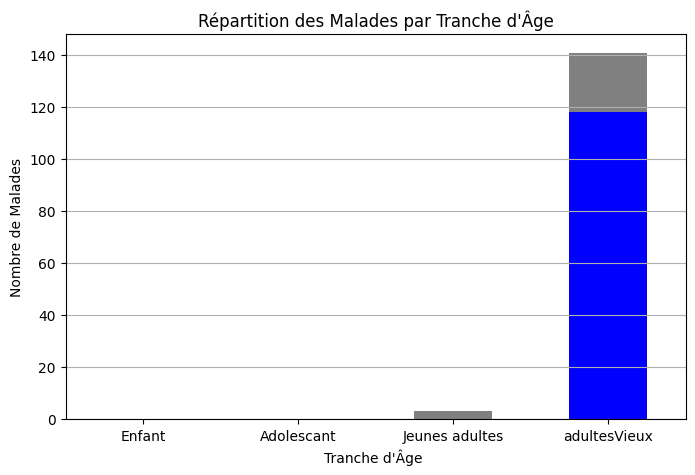

In [11]:
bins = [6,13,17,34, 64]  # 100 est un seuil arbitraire pour inclure les personnes âgées
labels = ['Enfant', 'Adolescant','Jeunes adultes','adultes' 'Vieux']
data_set['age_group'] = pd.cut(data_set['age'], bins=bins, labels=labels)
patients_malade = data_set[data_set['target'] == 1]
patients_m = data_set[data_set['target'] == 0]
# Compter le nombre de malades par tranche d'âge
age_distribution = patients_malade['age_group'].value_counts().sort_index()
age_d = patients_m['age_group'].value_counts().sort_index()

# Visualiser la répartition
plt.figure(figsize=(8, 5))
age_distribution.plot(kind='bar', color='gray')
age_d.plot(kind='bar', color='blue')
# Ajouter des titres et des étiquettes
plt.title('Répartition des Malades par Tranche d\'Âge')
plt.xlabel('Tranche d\'Âge ')
plt.ylabel('Nombre de Malades')
plt.xticks(rotation=0)
plt.grid(axis='y')

# Afficher le graphique
plt.show()

In [7]:
print("General Stats::",data_set.info())
print("Nombres de lignes::",data_set.shape[0])
print("Nombre d'attributs::",data_set.shape[1] )
print("Noms d'attributs::",data_set.columns.values.tolist())
print("Colonnes avec valeurs manquantes ::",data_set.columns[data_set.isnull().any()].tolist())

<class 'pandas.core.frame.DataFrame'>
Index: 302 entries, 0 to 878
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   age        302 non-null    int64   
 1   sex        302 non-null    int64   
 2   cp         302 non-null    int64   
 3   trestbps   302 non-null    int64   
 4   chol       302 non-null    int64   
 5   fbs        302 non-null    int64   
 6   restecg    302 non-null    int64   
 7   thalach    302 non-null    int64   
 8   exang      302 non-null    int64   
 9   oldpeak    302 non-null    float64 
 10  slope      302 non-null    int64   
 11  ca         302 non-null    int64   
 12  thal       302 non-null    int64   
 13  target     302 non-null    int64   
 14  age_group  302 non-null    category
dtypes: category(1), float64(1), int64(13)
memory usage: 35.8 KB
General Stats:: None
Nombres de lignes:: 302
Nombre d'attributs:: 15
Noms d'attributs:: ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'r

In [8]:
print(" Analyse statistique ::")
data_set.describe()

 Analyse statistique ::


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


<Figure size 1000x600 with 0 Axes>

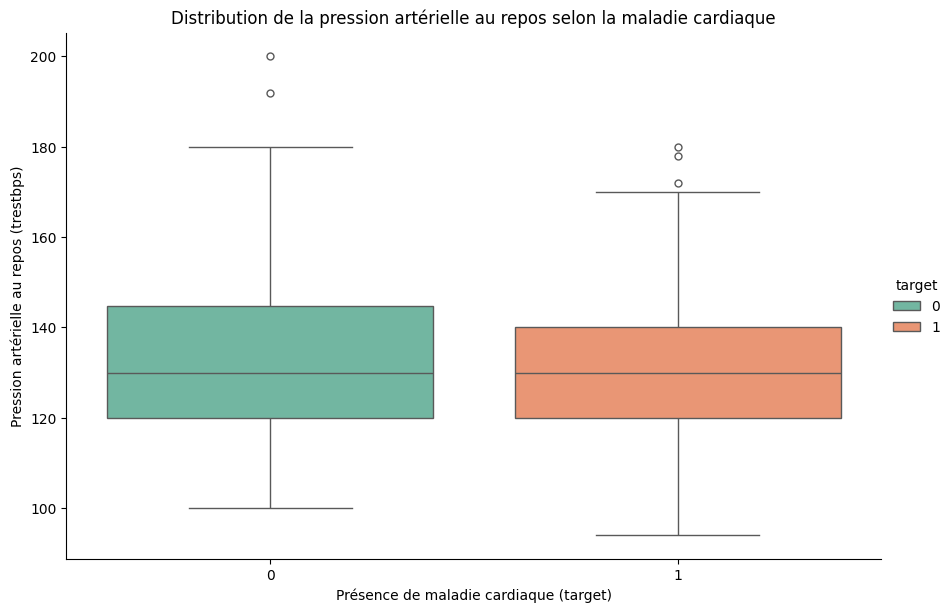

In [9]:
# Créer un boxplot avec des couleurs différentes pour chaque catégorie
plt.figure(figsize=(10, 6))
sns.catplot(x='target', y='trestbps', hue='target', kind='box', data=data_set, palette="Set2", height=6, aspect=1.5)

# Ajouter un titre et des labels
plt.title("Distribution de la pression artérielle au repos selon la maladie cardiaque")
plt.xlabel("Présence de maladie cardiaque (target)")
plt.ylabel("Pression artérielle au repos (trestbps)")
plt.show()

In [10]:
#Vérification des valeurs manquantes
print(data_set.isnull().sum())

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
target       0
age_group    0
dtype: int64


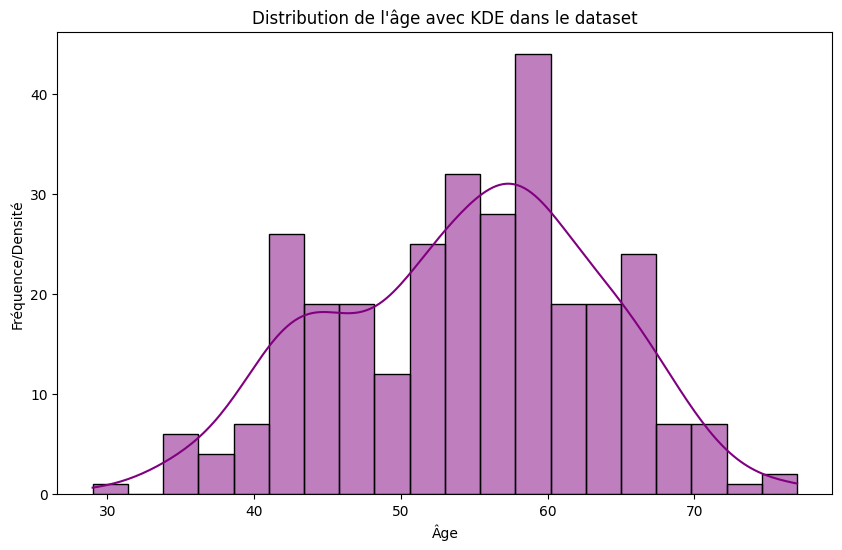

In [11]:
plt.figure(figsize=(10, 6))
sns.histplot(data_set['age'], bins=20, kde=True, color='purple')

# Ajouter un titre et des labels
plt.title("Distribution de l'âge avec KDE dans le dataset")
plt.xlabel("Âge")
plt.ylabel("Fréquence/Densité")
plt.show()

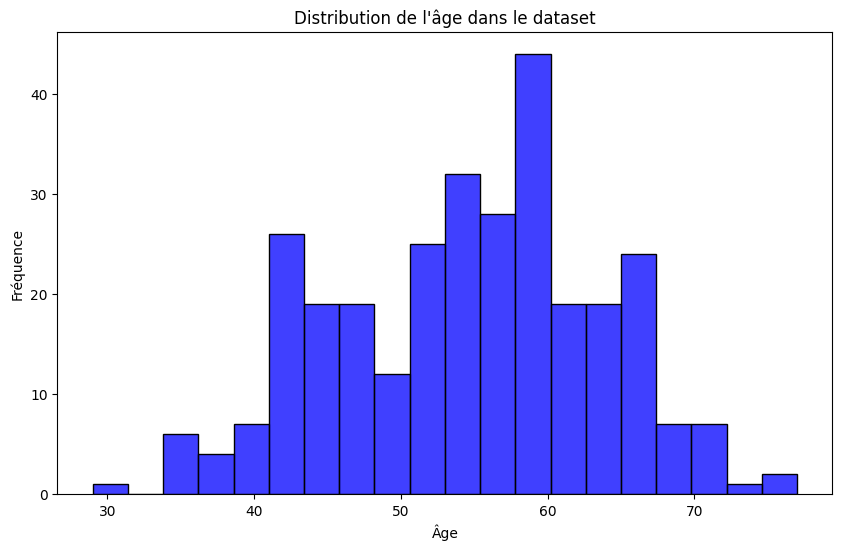

In [12]:
# Créer un histogramme pour visualiser la distribution de l'âge
plt.figure(figsize=(10, 6))
sns.histplot(data_set['age'], bins=20, kde=False, color='blue')

# Ajouter un titre et des labels
plt.title("Distribution de l'âge dans le dataset")
plt.xlabel("Âge")
plt.ylabel("Fréquence")
plt.show()

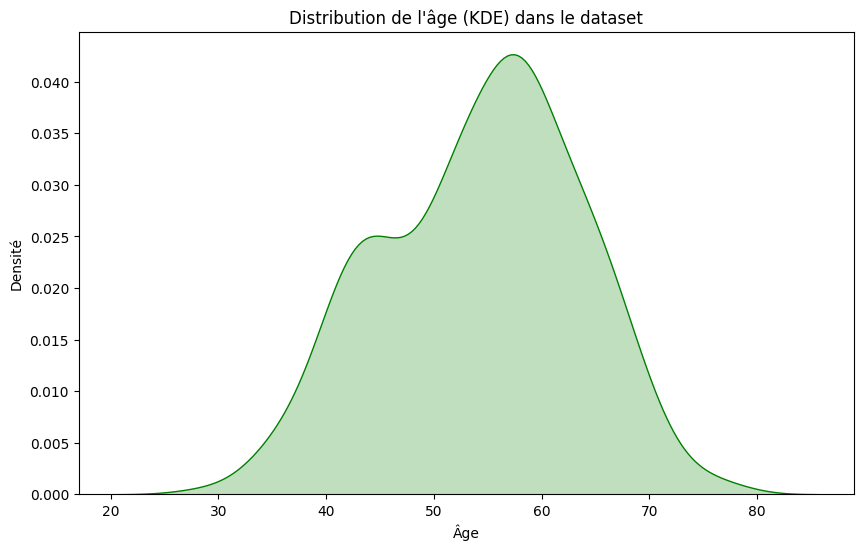

In [16]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data_set['age'], fill=True, color='green')

# Ajouter un titre et des labels
plt.title("Distribution de l'âge (KDE) dans le dataset")
plt.xlabel("Âge")
plt.ylabel("Densité")
plt.show()